In [1]:
from myusefultools.pyopenfoam import OpenFOAM
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

In [2]:
of = OpenFOAM(
    path_case=Path("CASES/dry_480__flood_480"), 
    path_template=Path("TEMPLATE_PRERUN"))

In [5]:
total_biomass = {k:of.read_field_all_times(k) for k in ["XAR", "XDN", "XN", "XI", "EPS"]}
total_biomass

{'XAR': <xarray.DataArray (z: 201, t: 210)>
 array([[8.38357985e-01, 8.29868019e-01, 8.21305990e-01, ...,
         3.02863002e-01, 2.93087989e-01, 2.89905012e-01],
        [6.87583029e-01, 6.77938998e-01, 6.68422520e-01, ...,
         2.53497511e-01, 2.45629504e-01, 2.43064493e-01],
        [4.39200997e-01, 4.29746985e-01, 4.20575500e-01, ...,
         1.59262002e-01, 1.54746503e-01, 1.53271005e-01],
        ...,
        [1.15174497e-03, 1.11982506e-03, 1.08874496e-03, ...,
         6.58331992e-05, 6.39545033e-05, 6.33426025e-05],
        [1.14449998e-03, 1.11279998e-03, 1.08193501e-03, ...,
         6.55218973e-05, 6.36519981e-05, 6.30425493e-05],
        [1.14120997e-03, 1.10961997e-03, 1.07886002e-03, ...,
         6.54035030e-05, 6.35370016e-05, 6.29283968e-05]])
 Coordinates:
   * z        (z) float32 2.0 1.99 1.98 1.97 1.96 ... 0.04 0.03 0.02 0.01 0.0
   * t        (t) float64 8.613e+03 1.725e+04 2.589e+04 ... 8.701e+05 8.73e+05,
 'XDN': <xarray.DataArray (z: 201, t: 210)>
 array

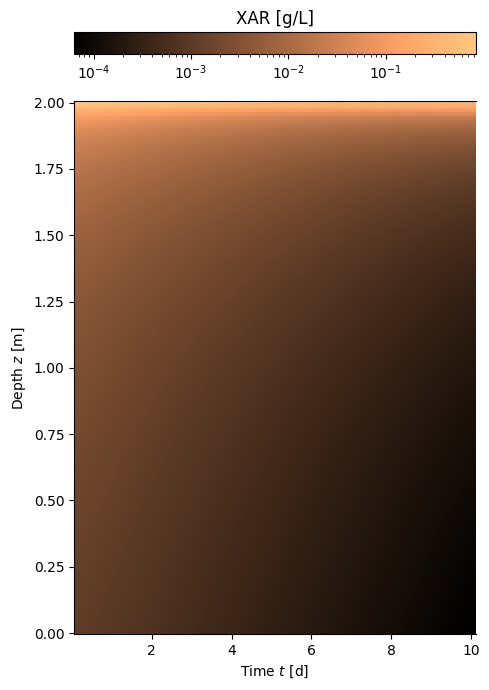

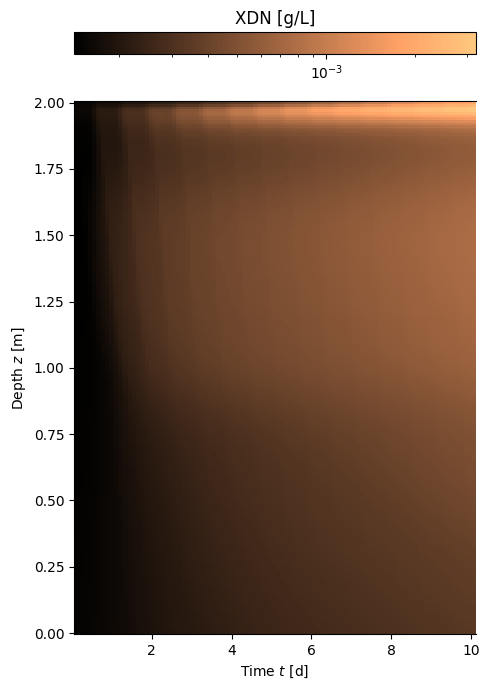

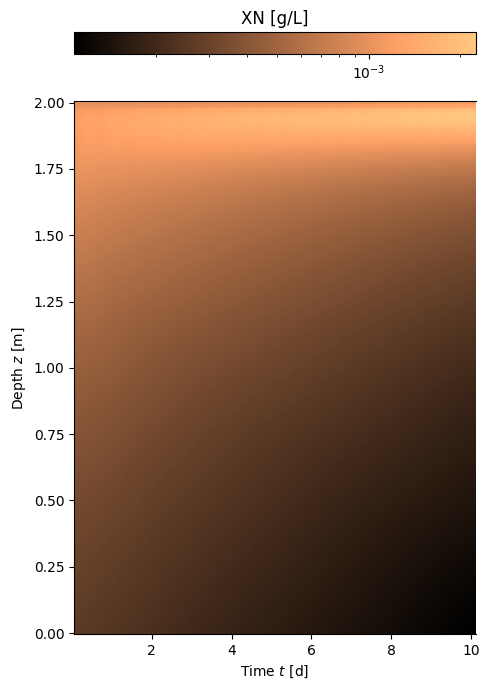

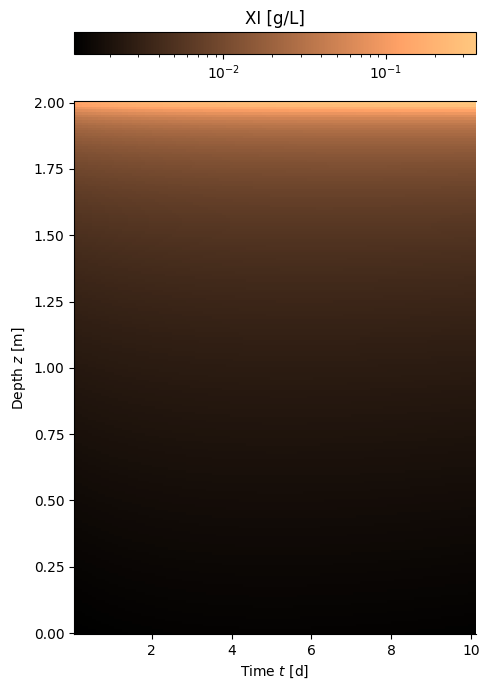

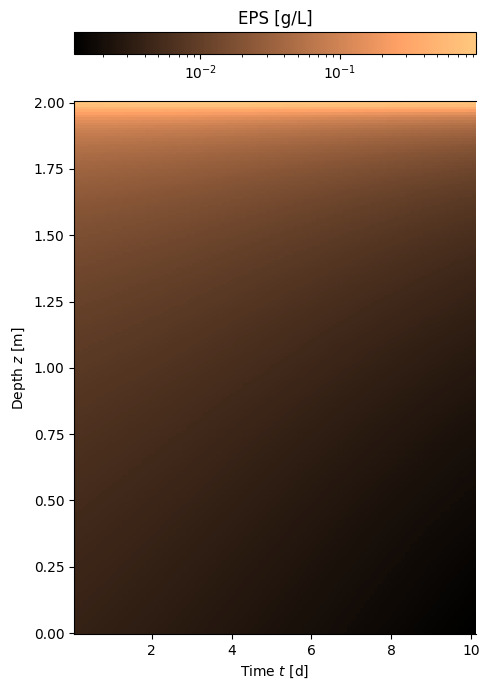

In [7]:
igt = 0
for k, scalar in total_biomass.items():
    fig, (cax, ax) = plt.subplots(
        2, 1, figsize=[5, 7], gridspec_kw={"height_ratios": [0.2, 5]}, sharex=False
    )

    img = ax.pcolormesh(
        scalar.t[igt:] / 86400, scalar.z, scalar[:, igt:], 
        cmap="copper",
        # norm=colors.LogNorm(vmin=max(scalar.min(), 1.0e-8), vmax=scalar.max())
        norm=colors.LogNorm()
    )


    ax.spines.right.set_visible(False)
    ax.set_xlabel("Time $t$ [d]")
    ax.set_ylabel("Depth $z$ [m]")
    plt.colorbar(img, cax=cax, orientation="horizontal")
    cax.set_title(rf"{k} [g/L]")
    fig.tight_layout()
    plt.show()